In [140]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [8]:
df=pd.read_csv('C:\\Users\\Pratiksha\\Desktop\\data engineering\\66DaysofData\\carPredication\\car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [14]:
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [17]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [42]:
data=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [24]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [44]:
data['current_year']=2020

In [32]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [45]:
data['no_years']=data['current_year']-data['Year']

In [34]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [48]:
data.drop('Year',axis=1,inplace=True)

In [46]:
data.drop('current_year',axis=1,inplace=True)

In [49]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [50]:
data=pd.get_dummies(data,drop_first=True)

In [51]:
data

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [54]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


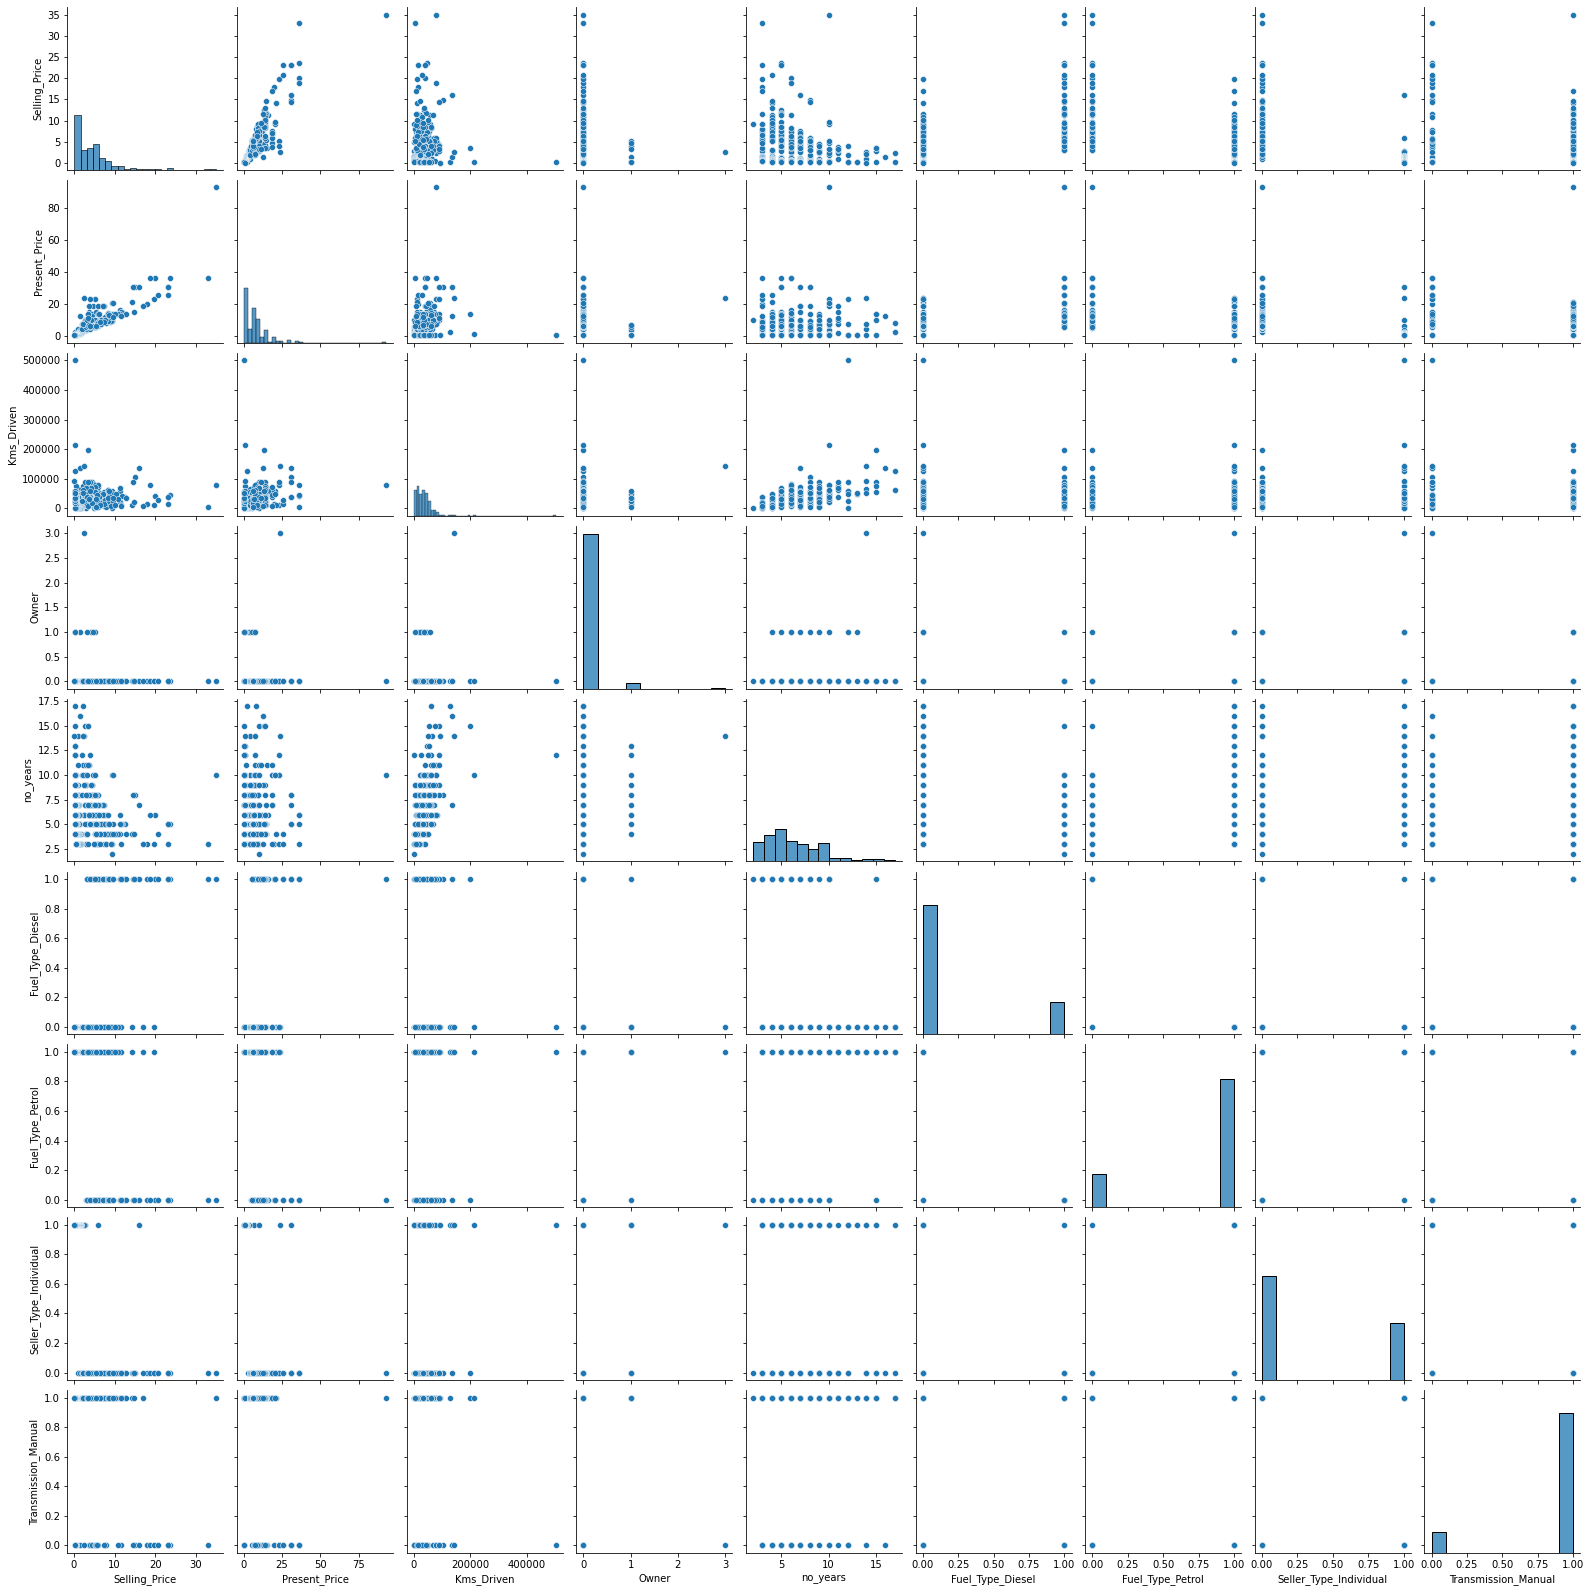

In [57]:
sbn.pairplot(data)

<AxesSubplot:>

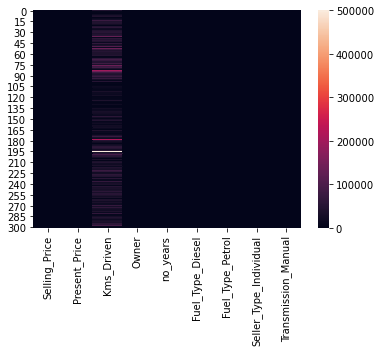

In [60]:
sbn.heatmap(data)

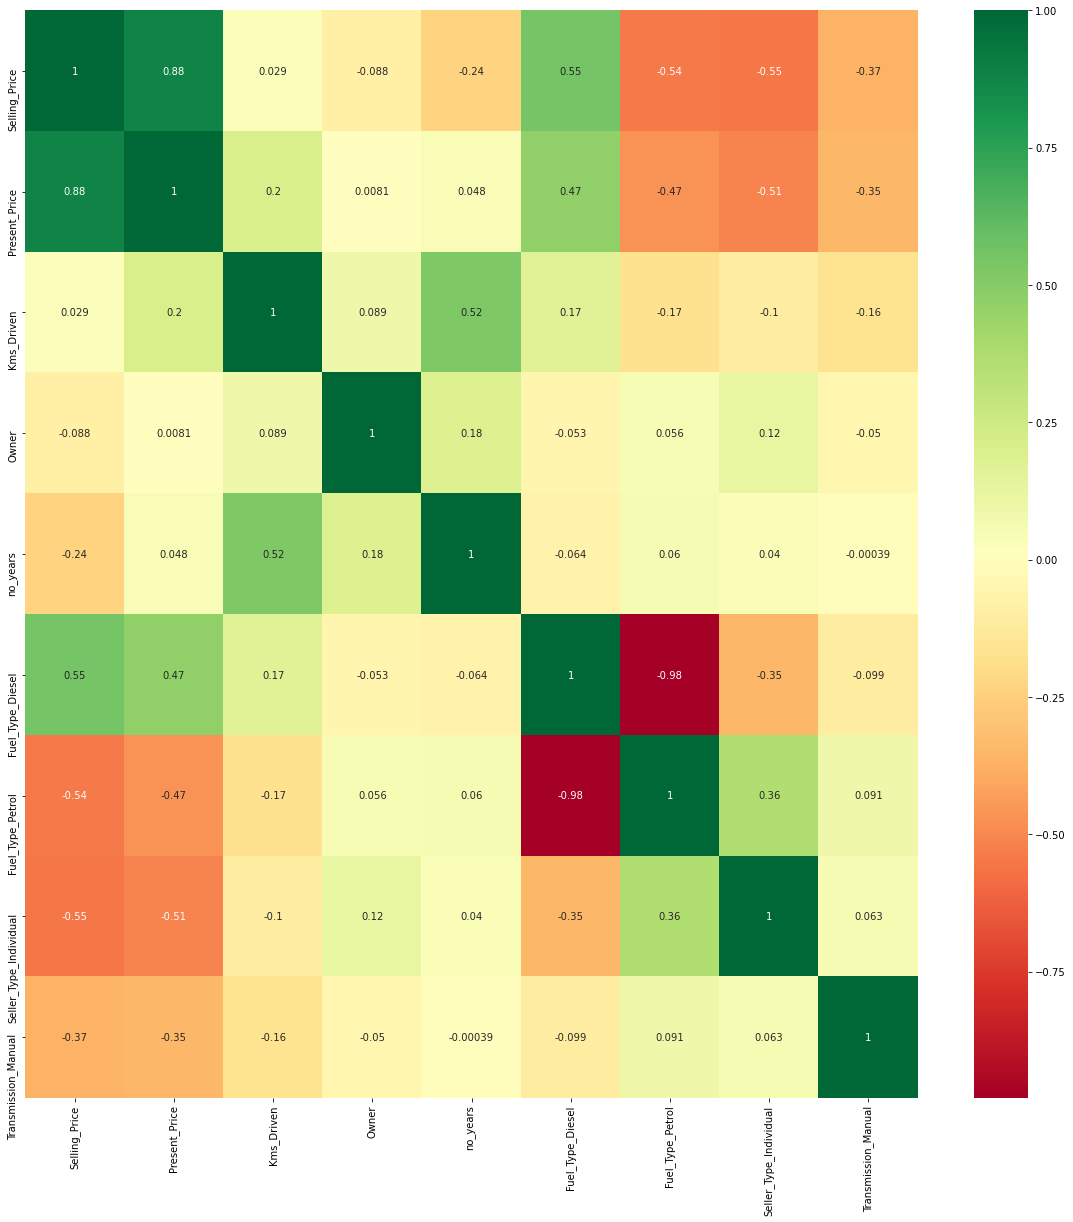

In [64]:
cormat=data.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))
g=sbn.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [66]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [67]:
x=data.iloc[:,1:]

In [68]:
y=data.iloc[:,:1]

In [71]:
x.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [72]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [77]:
model=ExtraTreesRegressor()
model.fit(x,y)

<ipython-input-77-4dd2785a2c84>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


ExtraTreesRegressor()

In [91]:
imp_features=pd.Series(model.feature_importances_,index=x.columns)

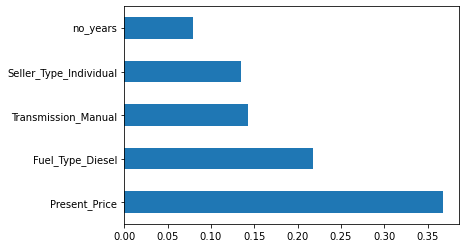

In [92]:
imp_features.nlargest(5).plot(kind='barh')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [108]:
x_train.shape

(240, 8)

In [131]:
x_test.shape

(61, 8)

In [110]:
y_train.shape

(240, 1)

In [111]:
y_test.shape

(61, 1)

In [99]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [135]:
y_pred=model.predict(x_test)

In [103]:
model.coef_

array([[ 4.37565869e-01, -6.26627622e-06, -8.80867581e-01,
        -4.24957554e-01,  2.31107966e+00,  4.34427330e-01,
        -1.20815733e+00, -1.64882316e+00]])

In [117]:
print('Mean squared error:%.2f'% mean_squared_error(y_test,y_pred))

Mean squared error:1.82


In [121]:
print('coefficient of determination:%.2f'% r2_score(y_test,y_pred))

coefficient of determination:0.86


In [136]:
data.tail(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,9.50,11.6,33988,0,4,1,0,0,1
297,4.00,5.9,60000,0,5,0,1,0,1
298,3.35,11.0,87934,0,11,0,1,0,1
299,11.50,12.5,9000,0,3,1,0,0,1
300,5.30,5.9,5464,0,4,0,1,0,1


In [144]:
model.predict([[5.9,60000,0,5,0,1,0,1]])

array([[4.21646105]])

In [ ]:
#model accouracy

In [145]:
r2_score(y_test,y_pred)

0.8611500428317483

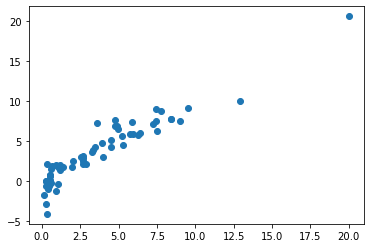

In [146]:
plt.scatter(y_test,y_pred)

In [154]:
#difference between actual and predicted value
diff=y_test-y_pred
diff.head()

,Selling_Price
110,-0.768869
146,-0.078054
74,-1.949856
153,0.396066
243,0.532607
